## 6.5 Machine Learning 

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering


# 1. Importing libraries and data and renaming columns

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# define path
PATH = 'Data'

In [5]:
# import data

df= pd.read_csv(os.path.join(PATH, 'Prepared Data', 'df_titles'))

In [6]:
df.head(5)

,release_year,number_of_titles
0,1942,1
1,1944,1
2,1945,1
3,1946,1
4,1947,1


In [7]:
df.shape

(72, 2)

In [8]:
df2= pd.read_csv(os.path.join(PATH, 'Prepared Data', 'Netflix_clean'))


In [9]:
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Type_encoded,Country_encoded
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States of America,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,96
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,29
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,11
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,95
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",Jordan,"March 9, 2016",2015,TV-MA,96,"Dramas, International Movies, Thrillers",0,43
6882,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States of America,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers",0,96
6883,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States of America,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",0,96
6884,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States of America,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies",0,96


In [57]:
subset= df2[['Type_encoded', 'Country_encoded']]

# 2. The elbow technique

In [59]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [42]:
# for df_titles
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score 

[-1658359.9861111115,
 -276095.2575757576,
 -118808.46283524904,
 -69108.87134502924,
 -46039.10131578948,
 -34930.931547619046,
 -25041.50789473684,
 -16692.25358484703,
 -12519.942028985508]

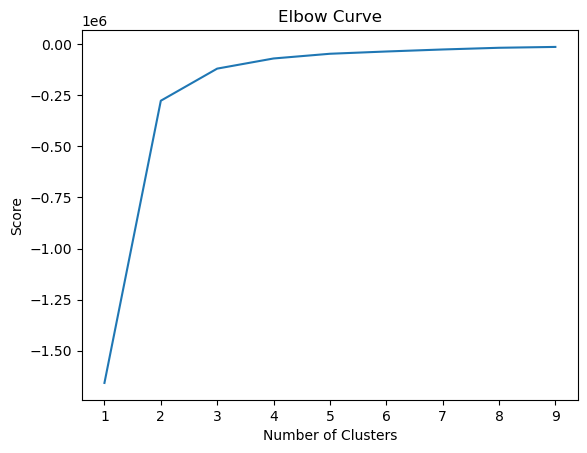

In [43]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there is a large jump from 2 to 3 on the x-axis, but after that , the curve straighten out.This means that the optimal count for this clusters is 3.

# 3. k-means clustering

In [44]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [45]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/sonaliavinash/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [46]:
df['clusters'] = kmeans.fit_predict(df)

/Users/sonaliavinash/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
df

,release_year,number_of_titles,clusters
0,1942,1,0
1,1944,1,0
2,1945,1,0
3,1946,1,0
4,1947,1,0
...,...,...,...
67,2017,658,1
68,2018,648,1
69,2019,519,1
70,2020,442,1


In [48]:
df['clusters'].value_counts()

clusters
0    58
2     9
1     5
Name: count, dtype: int64

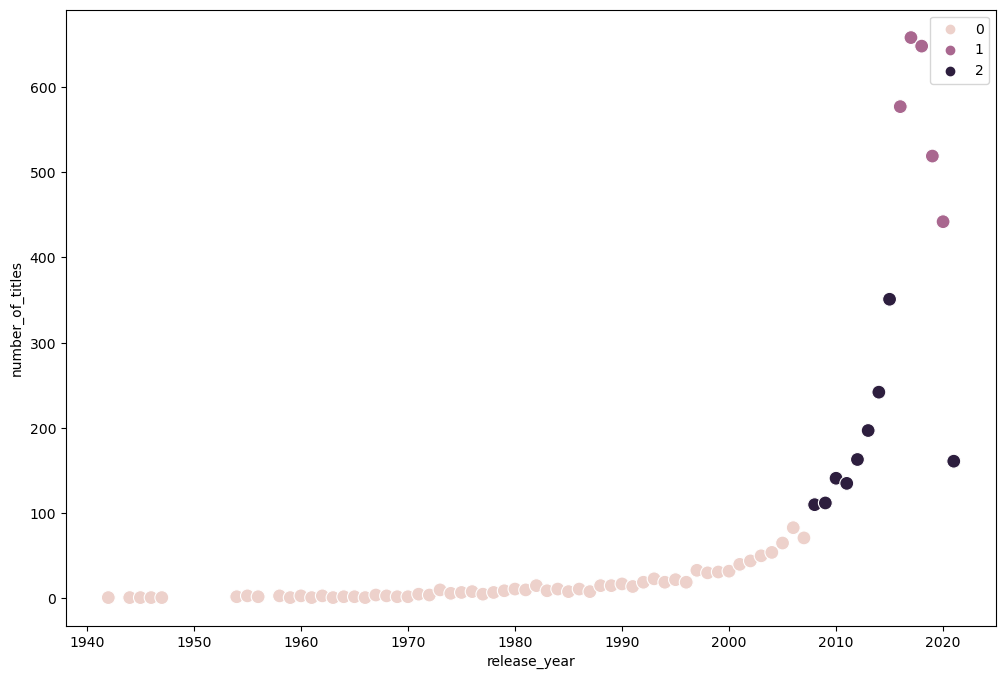

In [49]:
# Plot the clusters for the "release_year" and "number_of_titles" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['release_year'], y=df['number_of_titles'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('release_year') # Label x-axis.
plt.ylabel('number_of_titles') # Label y-axis.
plt.show()

In [73]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [76]:
# descriptive statistics

df.groupby('cluster').agg({'release_year':['mean','median'],
                               'number_of_titles':['mean','median']})

release_year         number_of_titles       
                    mean  median             mean median
cluster                                                 
dark purple  2012.555556  2012.0       179.111111  161.0
pink         1977.827586  1978.5        15.172414    8.0
purple       2018.000000  2018.0       568.800000  577.0

The analysis reveals distinct clusters based on release year and number of titles. For the "dark purple" cluster, the mean and median release year are both around 2012, with an average of approximately 179 titles. Conversely, the "pink" cluster comprises older titles, with mean and median release years of about 1978, and a relatively low mean title count of around 15. In contrast, the "purple" cluster consists of newer titles, with a mean release year of 2018 and a significantly higher mean title count of approximately 569.

It suggest that the clusters represent different groups of titles based on their release year and the number of titles in each cluster. The "dark purple" cluster appears to contain moderately older titles, while the "pink" cluster contains even older titles with fewer counts. On the other hand, the "purple" cluster consists of newer titles with a substantial count.




